#  实验结果记录

In [1]:
# 记录使用input anderson normalize(0, 1)后的结果
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import pandas as pd

In [2]:
def get_median_abs(output_f, index = 0):
    return np.median(np.abs(np.array(output_f[:, index, 0, 0])))

In [4]:
# 保存成andersondatase，才能进行训练。
def save_median(save_median, chebyshev, anderson):
    save_h5 = h5py.File(save_median, 'w')
    save_h5.create_dataset('chebyshev', data=chebyshev, dtype='float64')
    save_h5.create_dataset('anderson', data=anderson)
    save_h5.close()
    

In [3]:
save_median = 'datasets/chebyshev_0_4000.h5'

In [19]:
c_h5 = h5py.File(save_median, 'r')
np.array(c_h5['anderson'][0,:, 0,0]), np.array(c_h5['chebyshev'][0, :, 0, 0])

(array([ 6.96469186,  0.2065269 ,  1.63142385,  4.40297536, -4.13522458,
         0.86176524,  1.3410227 ,  0.41840878]),
 array([1.00447011]))

# h5py
```
{
"model_000":{
    "log_dict":{
        'training_loss_per_batch':[],
        'training_loss_per_epoch': [],
        'validation_loss_per_batch': [],  #可选
        'validation_loss_per_epoch':[]    #可选
        }
    }
"model_001":{}
}
```

In [5]:
def plot_loss_class(file, title, n_model='model_000', train_only=False, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]['log_dict']
            train_loss = train_grp['training_loss_per_epoch'][:]
            validate_loss = train_grp['validation_loss_per_epoch'][:]
            
            train_loss = np.sqrt(np.array(train_loss))
            validate_loss = np.sqrt(np.array(validate_loss))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.grid()
            plt.xlabel('Epoch')
            plt.ylabel('RMSE')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss : {train_loss[-1]}')
            print(f'validate_loss : {validate_loss[-1]}')


## layer 7

train_loss : 12.685103423540532
validate_loss : 0.16608370904847727


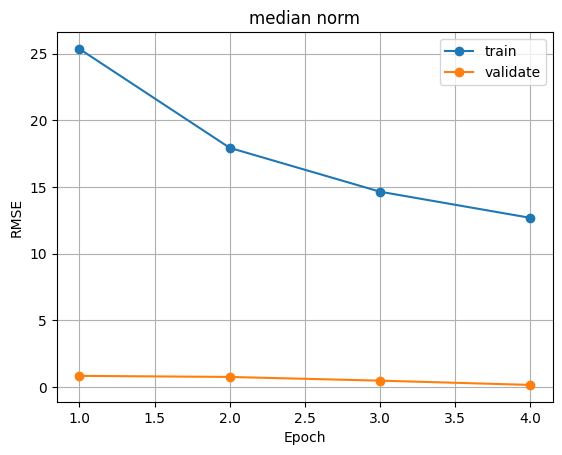

In [7]:
plot_loss_class(file='loss_class.h5', title="median norm")

In [7]:
training_file = "datasets/chebyshev_0_4000.h5"
testing_file = "datasets/chebyshev_0_testing_1000.h5",
# train data
from run_mlp import main
main('config_debug.json')

epoch 1 in training:   0%|                                                                                                                                                                                                | 0/2 [00:00<?, ?it/s] train-mlp - DEBUG -  y_pred : tensor([0.0250, 0.0314, 0.0259, 0.0146, 0.0150, 0.0243, 0.0207, 0.0286, 0.0196,
        0.0139], device='cuda:0', dtype=torch.float64,
       grad_fn=<SliceBackward0>)
 train-mlp - DEBUG -  y_pred : tensor([0.0250, 0.0314, 0.0259, 0.0146, 0.0150, 0.0243, 0.0207, 0.0286, 0.0196,
        0.0139], device='cuda:0', dtype=torch.float64,
       grad_fn=<SliceBackward0>)
 train-mlp - DEBUG -  y_pred : tensor([0.0250, 0.0314, 0.0259, 0.0146, 0.0150, 0.0243, 0.0207, 0.0286, 0.0196,
        0.0139], device='cuda:0', dtype=torch.float64,
       grad_fn=<SliceBackward0>)
 train-mlp - DEBUG -  y_pred : tensor([0.0250, 0.0314, 0.0259, 0.0146, 0.0150, 0.0243, 0.0207, 0.0286, 0.0196,
        0.0139], device='cuda:0', dtype=torch.float6

IndexError: too many indices for tensor of dimension 1

train_loss : 0.547747132994875
validate_loss : 0.5087955104487999


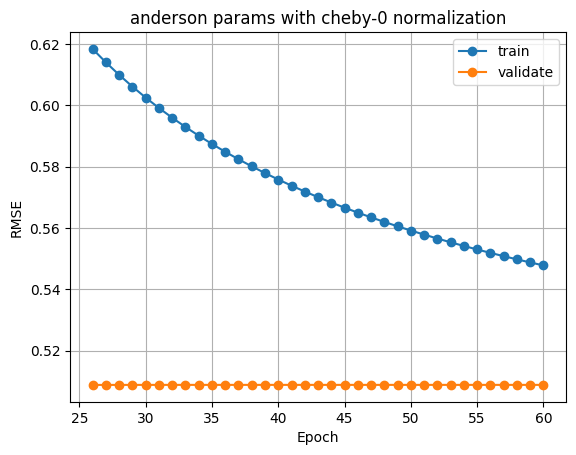

In [9]:
# add validate,change MSE to RMSE, to plot
# training dataset size is 4000
loss_f = 'jupyter/loss_n7.h5'
plot_loss_class(loss_f, begin=25, title='anderson params with cheby-0 normalization')

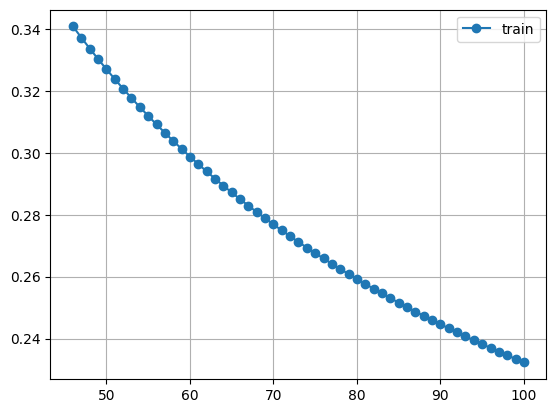

In [48]:
loss_f = '../nn_7/loss_e100.h5'
plot_loss_class(loss_f, train_only=True, begin=45)

train_loss : 0.23228640029074035
validate_loss : 0.9845846225433449


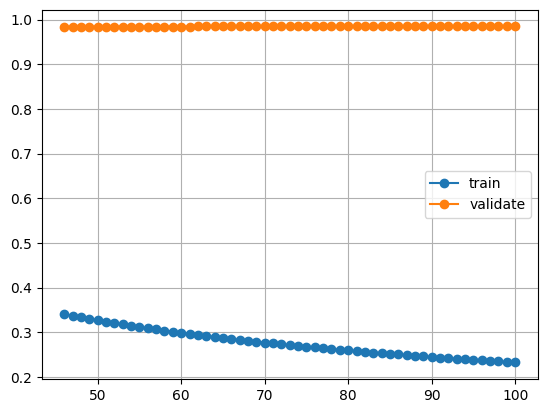

In [7]:
# 训练集可以下降，但是验证集无法下降。
loss_f = '../nn_7/loss_e100.h5'
plot_loss_class(loss_f, train_only=False, begin=45)

## layer 14

train_loss : 3.276322395869217
validate_loss : 1.05086892281056


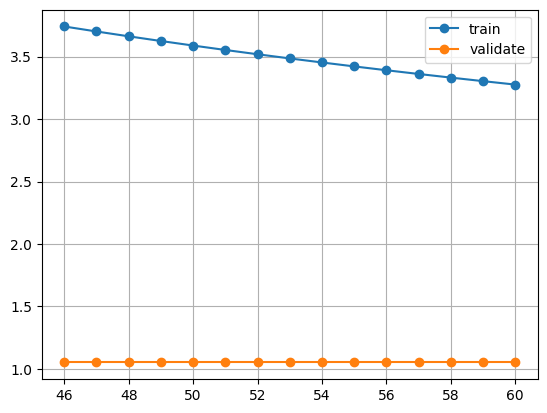

In [8]:
loss_f = '../nn_14/loss.h5'
plot_loss_class(loss_f, begin=45)

# 改进方法探索

## Increase the size of your training dataset

In [9]:
# we use L6N255_10000.h5 to train nn-7
ds_file = '../datasets/L6N255_10000.h5'
save_file = '../datasets/chebyshev_0_10000.h5'
ds_h5 = h5py.File(ds_file, 'r')
get_median_abs(ds_h5['chebyshev'])

0.0128608787769292

In [10]:
dataset_to_median(ds_file, save_file, chebyshev_index=0)

In [11]:
h5 = h5py.File(save_file, 'r')
h5_origin = h5py.File(ds_file, 'r')
print(h5['chebyshev'][0, :10, 0, 0])
print(h5_origin['chebyshev'][0, :10, 0, 0])
h5.close()
h5_origin.close()

[ 1.00350955  0.06296187 -1.81335516 -0.15909255  1.45647112  0.19941109
 -1.01407701 -0.1763132   0.56959913  0.10007675]
[ 0.01290601  0.00080974 -0.02332134 -0.00204607  0.0187315   0.0025646
 -0.01304192 -0.00226754  0.00732555  0.00128707]


train_loss : 0.3652554668580644
validate_loss : 0.9838866028783717


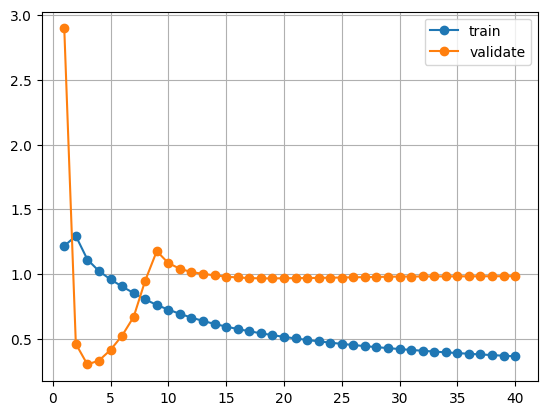

In [12]:
loss_f = '../nn_7/loss_10000.h5'
plot_loss_class(loss_f)
# 看着效果没有改善

## Normalize your input data
Scaling the input features to a similar range can prevent certain features from dominating the learning process and help the MLP model converge faster.

In [13]:
# input normal and output normal
norm_file = '../datasets/L6N255_norm_4000.h5'
test_file =  '../datasets/L6N255_norm_testing_1000.h5'
origin_file = '../datasets/L6N255_4000.h5'
norm_h5 = h5py.File(norm_file, 'r')
origin_h5 = h5py.File(origin_file, 'r')
print(norm_h5['anderson'][0, :, 0, 0])
print(origin_h5['anderson'][0, :, 0, 0])
print(norm_h5['chebyshev'][:10, 0, 0, 0])
print(origin_h5['chebyshev'][:10, 0, 0, 0])
norm_h5.close()
origin_h5.close()

[ 0.68381541  0.14702527  0.57410134  1.52228517 -1.4679175   0.26589211
  1.36513435 -0.79197495]
[ 6.96469186  0.2065269   1.63142385  4.40297536 -4.13522458  0.86176524
  1.3410227   0.41840878]
[ 0.4127383  -0.70970486 -0.79472978  0.05297968  0.51390807 -0.38533528
  1.81311748  0.34435893 -0.36895981 -1.18306869]
[0.0129169  0.01281907 0.01281166 0.01288554 0.01292572 0.01284734
 0.01303895 0.01291094 0.01284877 0.01277781]


In [ ]:
# 这里Chebyshev是用torchvision规范化的。

train_loss : 0.36677753399595325
validate_loss : 0.204268849864909


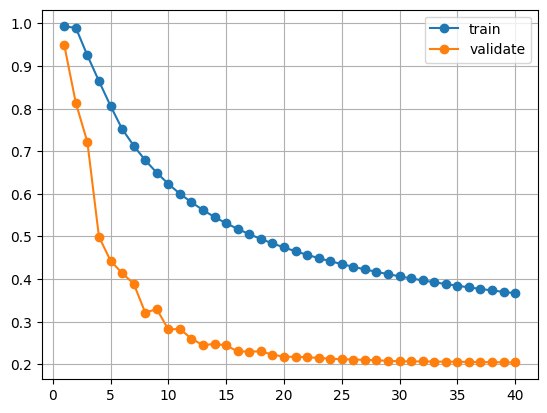

In [3]:
loss_file = '../nn_7/loss_norm.h5'
plot_loss_class(loss_file)

train_loss : 0.36677753399595325
validate_loss : 0.204268849864909


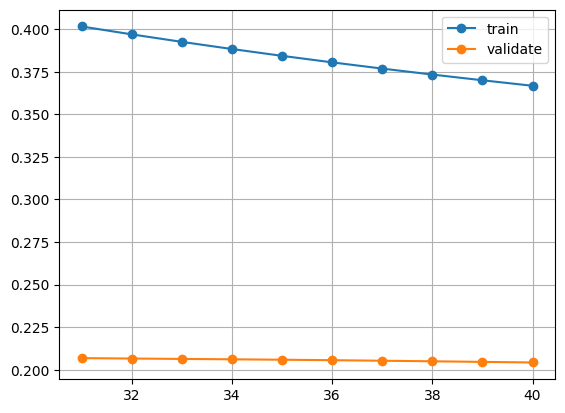

In [4]:
plot_loss_class(loss_file, begin=30)

初步看，与原始模型数据训练效果相比，loss从1.0减少到0.2, 训练epoch=60, loss 基本不降

train_loss : 0.32167978219310334
validate_loss : 0.20298810928524286


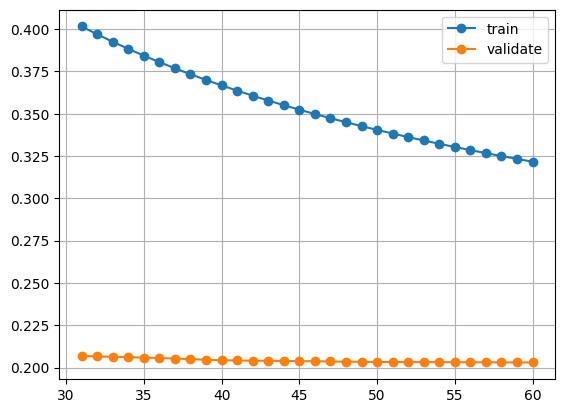

In [9]:
loss_file = '../nn_7/loss_norm_e60.h5'
plot_loss_class(loss_file, begin=30)

train_loss : 0.7359485783470682
validate_loss : 0.3525657839762708


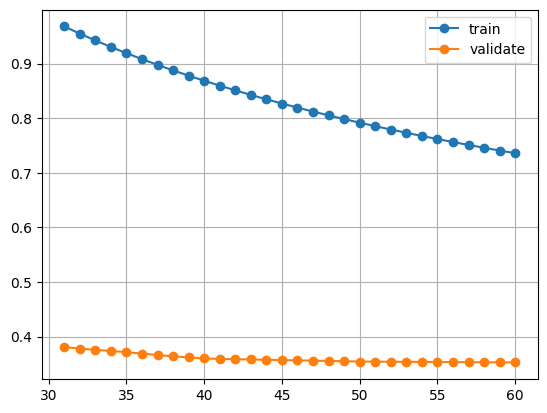

In [9]:
# 使用nn_14试一下
loss_file = '../nn_14/loss_norm_e60.h5'
plot_loss_class(loss_file, begin=30)

## **Adjust the architecture of your MLP**: 
Experiment with different numbers of hidden layers, neurons per layer, and activation functions to find the optimal configuration for your specific problem.
> resnet